## GRIP: The Sparks Foundation

### Data Science and Business Analytics Intern

### Author : Tejas Suresh Rangle

### Task 1 : Prediction Using Supervised ML

#### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data from remote link
url="http://bit.ly/w-data"
df=pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# shape of dataset
df.shape  #----> here we have 25 datapoints & 2 features.(25-rows,2-columns) 

(25, 2)

In [4]:
# statistical analysis
df.describe()  #----> here we get statistical information like mean,SD,percentiles. 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# Information about features
df.info()  #----> here we get the information about each feature like datatype of each feature,no of datapoints in each feature.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# check null values
df.isnull().sum()  #----> Dataset is free from null values

Hours     0
Scores    0
dtype: int64

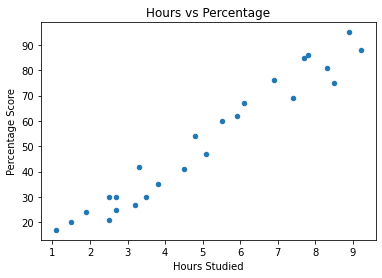

In [7]:
# Plotting the distribution of scores
df.plot(x="Hours",y="Scores",kind="scatter")
plt.title("Hours vs Percentage")  
plt.xlabel("Hours Studied")  
plt.ylabel("Percentage Score")  
plt.show()

#### Conclusion:- There is a positive linear relation between hours and percentage

In [8]:
# check correlation
df.corr(method="pearson")  #---->karl pearson coefficient ranges between -1 to +1

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Conclusion:- features are highly +ve co-related 

In [9]:
# seperation of dependent & independent features
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [10]:
# Train-Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1, random_state = 0)

In [11]:
# model creation---> LinearRegression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)  #----> Train the model with x_train,y_train
y_pred = regressor.predict(x_test)  #---->predict the percentage on the bases of hours
y_pred

array([17.30220982, 34.05529402, 75.44526674])

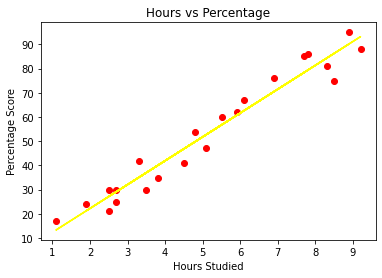

In [12]:
# Best fit-line
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,regressor.predict(x_train),color="yellow")
plt.title("Hours vs Percentage") 
plt.xlabel("Hours Studied")  
plt.ylabel("Percentage Score")
plt.show()

In [13]:
# Actual values Vs Predicted values
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
5,20,17.302210
2,27,34.055294
19,69,75.445267


In [14]:
# Model Evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)  

print("RMSE =", rmse)
print("R2 Score=",r2)

RMSE = 5.732850045774973
R2 Score= 0.9298077534821834


#### What would be the predicted score if a student studies for 9.25 hours/day?

In [15]:
hours=9.25
pred_pr = regressor.predict([[hours]])
print("Ans:-If the student studies for {} hours he/she will get {} % in exam".format(hours,pred_pr[0]))

Ans:-If the student studies for 9.25 hours he/she will get 93.67656425238499 % in exam
